# 数据聚合和分组运算
- 利用Python进行数据分析 第九章

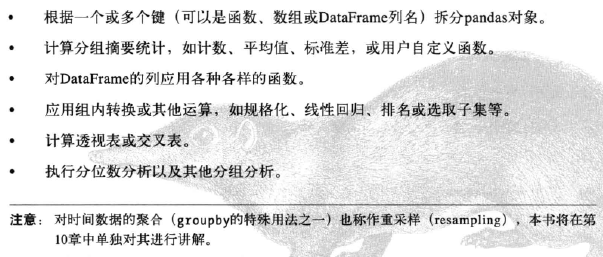

In [3]:
Image(filename="picture\Data Aggregation and Group Operations.png")

In [1]:
from pandas import DataFrame,Series
import pandas as pd

import numpy as np
from IPython.display import Image

import re

## 一、GroupBy 技术

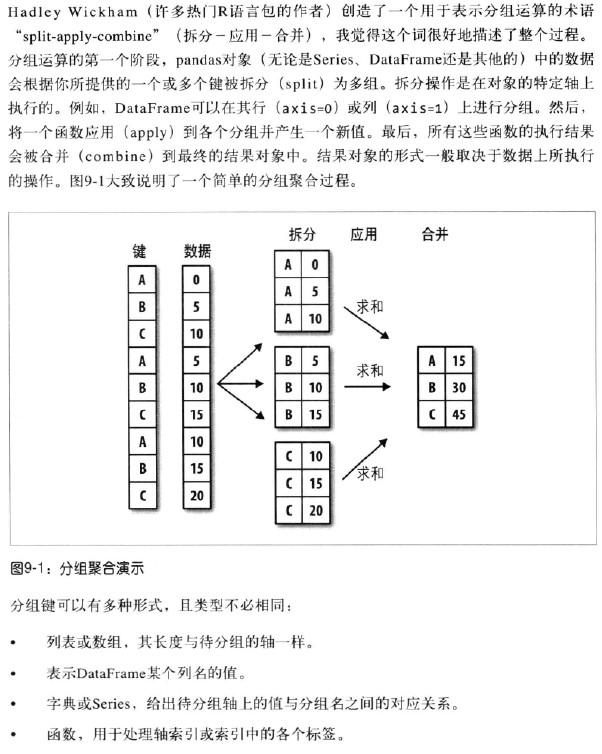

In [4]:
Image(filename="picture\GroupBy Mechanics.png")

In [4]:
df = DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],'key2' : ['one', 'two', 'one', 'two', 'one'],
  'data1' : np.random.randn(5),'data2' : np.random.randn(5)})

print df
print 
grouped = df['data1'].groupby(df['key1']) # 按key1 进行分组，并计算data1 列的平均值

print grouped
print 
print grouped.mean()
print 
means = df['data1'].groupby([df['key1'], df['key2']]).mean() # 一次传入多个数组
print means
print means.unstack()

      data1     data2 key1 key2
0  2.179813  0.788100    a  one
1  1.201084 -0.617797    a  two
2  0.327193 -2.200166    b  one
3 -0.539152 -0.473590    b  two
4 -0.943130 -1.773277    a  one


key1
a    0.812589
b   -0.105980
Name: data1, dtype: float64

key1  key2
a     one     0.618342
      two     1.201084
b     one     0.327193
      two    -0.539152
Name: data1, dtype: float64
key2       one       two
key1                    
a     0.618342  1.201084
b     0.327193 -0.539152


In [9]:
states = np.array(['Ohio', 'California', 'California', 'Ohio', 'Ohio'])
years = np.array([2005, 2005, 2006, 2005, 2006])
print df['data1'].groupby([states, years]).mean()  # 分组键除了series之外，还有任何长度适当的数组
print df.groupby('key1').mean()

print df.groupby(['key1', 'key2']).mean() # 列名（字符串、数字或其他Python对象）也可以作为分组键

California  2005   -0.835644
            2006   -0.398173
Ohio        2005    0.310546
            2006   -0.263047
Name: data1, dtype: float64
         data1     data2
key1                    
a    -0.416563  0.989780
b     0.186959  1.346017
              data1     data2
key1 key2                    
a    one  -0.207023  0.449001
     two  -0.835644  2.071338
b    one  -0.398173  1.553641
     two   0.772092  1.138392


In [8]:
print df.groupby(['key1', 'key2']).size() # 返回一个含有分组大小的Series

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64


### 1 对分组进行迭代

In [10]:
for name, group in df.groupby('key1'): # 产生一个二元元组（由分组名和数据块组成）
    print name
    print group

a
      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
4 -0.263047  0.130625    a  one
b
      data1     data2 key1 key2
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two


In [12]:
for (k1, k2), group in df.groupby(['key1', 'key2']): # 多重键时，元组的第一个元素是由键值组成的元组
    print k1, k2
    print group

a one
      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
4 -0.263047  0.130625    a  one
a two
      data1     data2 key1 key2
1 -0.835644  2.071338    a  two
b one
      data1     data2 key1 key2
2 -0.398173  1.553641    b  one
b two
      data1     data2 key1 key2
3  0.772092  1.138392    b  two


In [15]:
pieces = dict(list(df.groupby('key1')))

print pieces
print pieces['b'] # 对数据片段的操作
print df.dtypes

{'a':       data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
4 -0.263047  0.130625    a  one, 'b':       data1     data2 key1 key2
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two}
      data1     data2 key1 key2
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two
data1    float64
data2    float64
key1      object
key2      object
dtype: object


In [14]:
grouped = df.groupby(df.dtypes, axis=1) # 默认是 axis = 0

print grouped
print dict(list(grouped))

{dtype('O'):   key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one, dtype('float64'):       data1     data2
0 -0.150999  0.767377
1 -0.835644  2.071338
2 -0.398173  1.553641
3  0.772092  1.138392
4 -0.263047  0.130625}


### 2 选取一个或一组列

In [16]:
print df.groupby('key1')['data1']
print df.groupby('key1')[['data2']]

In [17]:
print df['data1'].groupby(df['key1'])
print df[['data2']].groupby(df['key1'])

In [94]:
print df.groupby(['key1', 'key2'])[['data2']].mean() # 只计算data2列数据，并以DataFrame形式得到结果

s_grouped = df.groupby(['key1', 'key2'])['data2']

print s_grouped
s_grouped.mean()

              data2
key1 key2          
a    one   0.449001
     two   2.071338
b    one   1.553641
     two   1.138392


key1  key2
a     one     0.449001
      two     2.071338
b     one     1.553641
      two     1.138392
Name: data2, dtype: float64

### 3 通过字典或Series进行分组

In [93]:
people = DataFrame(np.random.randn(5, 5),columns=['a', 'b', 'c', 'd', 'e'],
 index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])

print people

people.ix[2:3, ['b', 'c']] = np.nan # Add a few NA values
print 
print people

mapping = {'a': 'red', 'b': 'red', 'c': 'blue','d': 'blue', 'e': 'red', 'f' : 'orange'}
mapping

               a         b         c         d         e
Joe     0.475399  0.403276 -1.087455  0.596448  0.942394
Steve   0.109674 -0.747144  0.984319  0.968863  1.656754
Wes     0.050640 -0.031254 -0.951074 -1.311991  0.650527
Jim     0.923728 -1.041985  0.428581  1.243862 -0.138348
Travis -0.135706  0.418531  0.973229  1.098708  0.061967

               a         b         c         d         e
Joe     0.475399  0.403276 -1.087455  0.596448  0.942394
Steve   0.109674 -0.747144  0.984319  0.968863  1.656754
Wes     0.050640       NaN       NaN -1.311991  0.650527
Jim     0.923728 -1.041985  0.428581  1.243862 -0.138348
Travis -0.135706  0.418531  0.973229  1.098708  0.061967


{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [92]:
by_column = people.groupby(mapping, axis=1)

print by_column
print by_column.sum()

map_series = Series(mapping)
people.groupby(map_series, axis=1).count()

            blue       red
Joe     0.879595  2.163068
Steve   1.296097 -0.162462
Wes    -1.348553 -1.626573
Jim    -0.981987 -2.535688
Travis -2.037511 -0.495118


,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


### 4 通过函数进行分组

In [91]:
print people.groupby(len).sum()

key_list = ['one', 'one', 'one', 'two', 'two']
people.groupby([len, key_list]).min()

          a         b         c         d         e
3 -2.209436  0.452562  0.744759 -2.195705 -0.242320
5 -0.895872  0.354999  0.926228  0.369869  0.378411
6 -1.848603  0.995470 -0.869608 -1.167903  0.358014


a         b         c         d         e
3 one -1.604034  0.995408  0.783069 -1.348553 -0.022539
  two -0.265971 -0.542846 -0.038310 -0.943677 -1.726870
5 one -0.895872  0.354999  0.926228  0.369869  0.378411
6 two -1.848603  0.995470 -0.869608 -1.167903  0.358014

### 5 根据索引级别分组

In [90]:
columns = pd.MultiIndex.from_arrays([['US', 'US', 'US', 'JP', 'JP'],[1, 3, 5, 1, 3]], names=['cty', 'tenor'])
hier_df = DataFrame(np.random.randn(4, 5), columns=columns)
print columns
print hier_df
hier_df.groupby(level='cty', axis=1).count()

MultiIndex(levels=[[u'JP', u'US'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=[u'cty', u'tenor'])
cty          US                            JP          
tenor         1         3         5         1         3
0      0.247871 -1.707298 -0.407104 -0.148301  0.950252
1      0.244713  0.606718  2.242855  0.701460  1.439456
2     -0.904444 -1.502830  1.282569 -1.120275  0.801155
3      1.866324  0.306256 -0.597416  1.288203  0.430471


cty,JP,US
0,2,3
1,2,3
2,2,3
3,2,3


## 二、数据聚合
* 指任何能够从数组产生标量值的数据转换过程

In [33]:
print df

grouped = df.groupby('key1')
print 
print grouped['data1'].quantile(0.9) # 计算样本分位数

      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two
4 -0.263047  0.130625    a  one

key1
a   -0.173409
b    0.655065
Name: data1, dtype: float64


In [89]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

print grouped.agg(peak_to_peak) # 使用自己的聚合函数，只需将其传入aggregate或agg
grouped.describe()

               size   tip   tip_pct  total_bill
sex    smoker                                  
Female No         5  4.20  0.195876       28.58
       Yes        3  5.50  0.360233       41.23
Male   No         4  7.75  0.220186       40.82
       Yes        4  9.00  0.674707       43.56


size        tip    tip_pct  total_bill
sex    smoker                                                   
Female No     count  54.000000  54.000000  54.000000   54.000000
              mean    2.592593   2.773519   0.156921   18.105185
              std     1.073146   1.128425   0.036421    7.286455
              min     1.000000   1.000000   0.056797    7.250000
              25%     2.000000   2.000000   0.139708   12.650000
              50%     2.000000   2.680000   0.149691   16.690000
              75%     3.000000   3.437500   0.181630   20.862500
              max     6.000000   5.200000   0.252672   35.830000
       Yes    count  33.000000  33.000000  33.000000   33.000000
              mean    2.242424   2.931515   0.182150   17.977879
              std     0.613917   1.219916   0.071595    9.189751
              min     1.000000   1.000000   0.056433    3.070000
              25%     2.000000   2.000000   0.152439   12.760000
              50%     2.000000   2.880000   0.173913   16.270000
              75%     2.000000   3.500000   0.198216   22.120000
              max     4.000000   6.500000   0.416667   44.300000
Male   No     count  97.000000  97.000000  97.000000   97.000000
              mean    2.711340   3.113402   0.160669   19.791237
              std     0.989094   1.489559   0.041849    8.726566
              min     2.000000   1.250000   0.071804    7.510000
              25%     2.000000   2.000000   0.131810   13.810000
              50%     2.000000   2.740000   0.157604   18.240000
              75%     3.000000   3.710000   0.186220   22.820000
              max     6.000000   9.000000   0.291990   48.330000
       Yes    count  60.000000  60.000000  60.000000   60.000000
              mean    2.500000   3.051167   0.152771   22.284500
              std     0.892530   1.500120   0.090588    9.911845
              min     1.000000   1.000000   0.035638    7.250000
              25%     2.000000   2.000000   0.101845   15.272500
              50%     2.000000   3.000000   0.141015   20.390000
              75%     3.000000   3.820000   0.191697   28.572500
              max     5.000000  10.000000   0.710345   50.810000

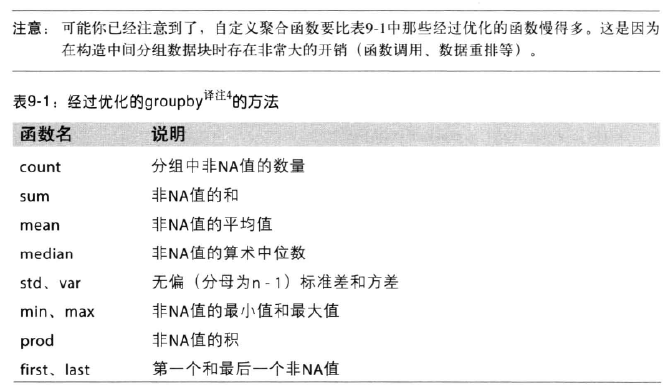

In [31]:
Image(filename="picture\Data Aggregation.png")

In [88]:
tips = pd.read_csv('Data_Files/tips.csv')
tips['tip_pct'] = tips['tip'] / tips['total_bill']

# print tips
tips[:6]

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240


### 1 面向列的多函数应用
* 对不同的列使用不同的聚合函数，或一次应用多个函数

In [87]:
grouped = tips.groupby(['sex', 'smoker']) # 分组
print grouped

grouped_pct = grouped['tip_pct']
print grouped_pct
print 
print grouped_pct.agg('mean') # 统计函数方法可以字符串形式传入
print 
print grouped_pct.agg(['mean', 'std', peak_to_peak]) # 传入一组函数或函数名
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])


sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

                   mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707


foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [86]:
functions = ['count', 'mean', 'max'] # 定义一组应用于全部列的函数，或不同的列应用不同的函数

result = grouped['tip_pct', 'total_bill'].agg(functions)
print result
result['tip_pct']

              tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81


count      mean       max
sex    smoker                           
Female No         54  0.156921  0.252672
       Yes        33  0.182150  0.416667
Male   No         97  0.160669  0.291990
       Yes        60  0.152771  0.710345

In [85]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
print grouped['tip_pct', 'total_bill'].agg(ftuples)
print 
print grouped.agg({'tip' : np.max, 'size' : 'sum'})
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],'size' : 'sum'})

                   tip_pct              total_bill           
              Durchschnitt Abweichung Durchschnitt Abweichung
sex    smoker                                                
Female No         0.156921   0.001327    18.105185  53.092422
       Yes        0.182150   0.005126    17.977879  84.451517
Male   No         0.160669   0.001751    19.791237  76.152961
       Yes        0.152771   0.008206    22.284500  98.244673

                tip  size
sex    smoker            
Female No       5.2   140
       Yes      6.5    74
Male   No       9.0   263
       Yes     10.0   150


tip_pct                               size
                    min       max      mean       std  sum
sex    smoker                                             
Female No      0.056797  0.252672  0.156921  0.036421  140
       Yes     0.056433  0.416667  0.182150  0.071595   74
Male   No      0.071804  0.291990  0.160669  0.041849  263
       Yes     0.035638  0.710345  0.152771  0.090588  150

### 2 以“无索引”的形式返回聚合数据

In [84]:
print tips.groupby(['sex', 'smoker']).mean()
tips.groupby(['sex', 'smoker'], as_index=False).mean()

               total_bill       tip      size   tip_pct
sex    smoker                                          
Female No       18.105185  2.773519  2.592593  0.156921
       Yes      17.977879  2.931515  2.242424  0.182150
Male   No       19.791237  3.113402  2.711340  0.160669
       Yes      22.284500  3.051167  2.500000  0.152771


,sex,smoker,total_bill,tip,size,tip_pct
0,Female,No,18.105185,2.773519,2.592593,0.156921
1,Female,Yes,17.977879,2.931515,2.242424,0.182150
2,Male,No,19.791237,3.113402,2.711340,0.160669
3,Male,Yes,22.284500,3.051167,2.500000,0.152771


## 三、分组级运算和转换
* transform 方法和 apply 方法，它们能够执行更多其他的分组运算

In [83]:
print df

k1_means = df.groupby('key1').mean().add_prefix('mean_')
print 
print k1_means
pd.merge(df, k1_means, left_on='key1', right_index=True)

      data1     data2 key1 key2
0 -0.150999  0.767377    a  one
1 -0.835644  2.071338    a  two
2 -0.398173  1.553641    b  one
3  0.772092  1.138392    b  two
4 -0.263047  0.130625    a  one

      mean_data1  mean_data2
key1                        
a      -0.416563    0.989780
b       0.186959    1.346017


,data1,data2,key1,key2,mean_data1,mean_data2
0,-0.150999,0.767377,a,one,-0.416563,0.989780
1,-0.835644,2.071338,a,two,-0.416563,0.989780
4,-0.263047,0.130625,a,one,-0.416563,0.989780
2,-0.398173,1.553641,b,one,0.186959,1.346017
3,0.772092,1.138392,b,two,0.186959,1.346017


In [82]:
print people
print 
key = ['one', 'two', 'one', 'two', 'one']
print people.groupby(key).mean()
people.groupby(key).transform(np.mean)

               a         b         c         d         e
Joe    -0.339430  0.995408  0.783069  0.096526  1.507090
Steve  -0.895872  0.354999  0.926228  0.369869  0.378411
Wes    -1.604034       NaN       NaN -1.348553 -0.022539
Jim    -0.265971 -0.542846 -0.038310 -0.943677 -1.726870
Travis -1.848603  0.995470 -0.869608 -1.167903  0.358014

            a         b         c         d         e
one -1.264022  0.995439 -0.043270 -0.806644  0.614188
two -0.580922 -0.093924  0.443959 -0.286904 -0.674229


,a,b,c,d,e
Joe,-1.264022,0.995439,-0.043270,-0.806644,0.614188
Steve,-0.580922,-0.093924,0.443959,-0.286904,-0.674229
Wes,-1.264022,0.995439,-0.043270,-0.806644,0.614188
Jim,-0.580922,-0.093924,0.443959,-0.286904,-0.674229
Travis,-1.264022,0.995439,-0.043270,-0.806644,0.614188


In [81]:
def demean(arr):  # 距平化函数
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
print demeaned
demeaned.groupby(key).mean()

               a         b         c         d         e
Joe     0.924592 -0.000031  0.826339  0.903169  0.892901
Steve  -0.314951  0.448922  0.482269  0.656773  1.052641
Wes    -0.340012       NaN       NaN -0.541909 -0.636728
Jim     0.314951 -0.448922 -0.482269 -0.656773 -1.052641
Travis -0.584581  0.000031 -0.826339 -0.361260 -0.256174


,a,b,c,d,e
one,7.401487e-17,-5.551115e-17,0,3.700743e-17,3.700743e-17
two,-2.775558e-17,0.000000e+00,0,0.000000e+00,0.000000e+00


### 1 apply：一般性的“拆分-应用-合并”

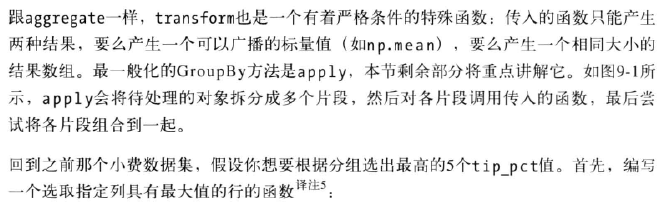

In [65]:
Image(filename="picture\Apply.png")

In [80]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips, n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [79]:
print tips.groupby('smoker').apply(top)
print 
print tips.groupby(['smoker', 'day']).apply(top, n=1, column='total_bill')

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345


total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  94   0.142857  
       Sat  212  0.186220  
       Sun  156  0.103799  
       Thur 142  0.121389  
Yes    Fri  95   0.117750  
       Sat  170  0.196812  
       Sun  182  0.077178  
       Thur 197  0.115982

In [78]:
result = tips.groupby('smoker')['tip_pct'].describe()
print result
result.unstack('smoker')

smoker       
No      count    151.000000
        mean       0.159328
        std        0.039910
        min        0.056797
        25%        0.136906
        50%        0.155625
        75%        0.185014
        max        0.291990
Yes     count     93.000000
        mean       0.163196
        std        0.085119
        min        0.035638
        25%        0.106771
        50%        0.153846
        75%        0.195059
        max        0.710345
dtype: float64


smoker,No,Yes
count,151.000000,93.000000
mean,0.159328,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


In [97]:
print tips.groupby('smoker').apply(top)
tips.groupby('smoker', group_keys=False).apply(top) # 禁止分组键

            total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345


,total_bill,tip,sex,smoker,day,time,size,tip_pct
88,24.71,5.85,Male,No,Thur,Lunch,2,0.236746
185,20.69,5.00,Male,No,Sun,Dinner,5,0.241663
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [77]:
f = lambda x: x.describe()
grouped.apply(f)

total_bill        tip       size    tip_pct
sex    smoker                                                   
Female No     count   54.000000  54.000000  54.000000  54.000000
              mean    18.105185   2.773519   2.592593   0.156921
              std      7.286455   1.128425   1.073146   0.036421
              min      7.250000   1.000000   1.000000   0.056797
              25%     12.650000   2.000000   2.000000   0.139708
              50%     16.690000   2.680000   2.000000   0.149691
              75%     20.862500   3.437500   3.000000   0.181630
              max     35.830000   5.200000   6.000000   0.252672
       Yes    count   33.000000  33.000000  33.000000  33.000000
              mean    17.977879   2.931515   2.242424   0.182150
              std      9.189751   1.219916   0.613917   0.071595
              min      3.070000   1.000000   1.000000   0.056433
              25%     12.760000   2.000000   2.000000   0.152439
              50%     16.270000   2.880000   2.000000   0.173913
              75%     22.120000   3.500000   2.000000   0.198216
              max     44.300000   6.500000   4.000000   0.416667
Male   No     count   97.000000  97.000000  97.000000  97.000000
              mean    19.791237   3.113402   2.711340   0.160669
              std      8.726566   1.489559   0.989094   0.041849
              min      7.510000   1.250000   2.000000   0.071804
              25%     13.810000   2.000000   2.000000   0.131810
              50%     18.240000   2.740000   2.000000   0.157604
              75%     22.820000   3.710000   3.000000   0.186220
              max     48.330000   9.000000   6.000000   0.291990
       Yes    count   60.000000  60.000000  60.000000  60.000000
              mean    22.284500   3.051167   2.500000   0.152771
              std      9.911845   1.500120   0.892530   0.090588
              min      7.250000   1.000000   1.000000   0.035638
              25%     15.272500   2.000000   2.000000   0.101845
              50%     20.390000   3.000000   2.000000   0.141015
              75%     28.572500   3.820000   3.000000   0.191697
              max     50.810000  10.000000   5.000000   0.710345

### 2 分位数（quantile）和桶分析（bucket）

In [102]:
frame = DataFrame({'data1': np.random.randn(1000),'data2': np.random.randn(1000)})
factor = pd.cut(frame.data1, 4)
# print factor
factor[:10]

0     (-1.109, 0.298]
1      (0.298, 1.705]
2      (0.298, 1.705]
3     (-1.109, 0.298]
4     (-1.109, 0.298]
5      (0.298, 1.705]
6    (-2.521, -1.109]
7      (0.298, 1.705]
8     (-1.109, 0.298]
9      (0.298, 1.705]
Name: data1, dtype: category
Categories (4, object): [(-2.521, -1.109] < (-1.109, 0.298] < (0.298, 1.705] < (1.705, 3.112]]

In [104]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(),
    'count': group.count(), 'mean': group.mean()}

grouped = frame.data2.groupby(factor) # 由cut返回的对象可直接用于groupby
print grouped
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.521, -1.109]",113,2.778406,-0.033486,-2.615494
"(-1.109, 0.298]",504,2.908592,-0.017832,-3.316983
"(0.298, 1.705]",337,2.643397,0.008808,-3.250365
"(1.705, 3.112]",46,2.733598,-0.066822,-2.453563


In [107]:
# Return quantile numbers
# 以上是区间大小相同的桶，根据样本分位数得到数据点数量相等的桶，传入labels = False
grouping = pd.qcut(frame.data1, 10, labels=False) 
grouped = frame.data2.groupby(grouping)
# print grouping
# print grouping
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100,2.778406,-0.057028,-2.615494
1,100,2.908592,0.000132,-3.316983
2,100,2.109617,-0.076422,-2.680205
3,100,2.234512,-0.077395,-2.164845
4,100,1.848888,0.057436,-1.841587
5,100,2.133210,0.000578,-1.969705
6,100,2.411869,0.108894,-3.022312
7,100,2.643397,0.090193,-1.959981
8,100,2.092811,-0.035173,-3.250365


### 3 示例：用特定于分组的值填充缺失值

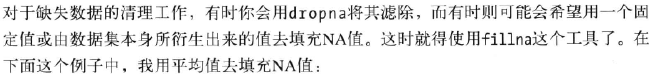

In [108]:
Image(filename="picture\Filling Missing Values with Group-specific Values.png")

In [112]:
s = Series(np.random.randn(6))

print s
print 
s[::2] = np.nan
print s
s.fillna(s.mean())    

0    0.846989
1    0.932653
2    0.580721
3    0.424334
4    1.696036
5    2.148086
dtype: float64

0         NaN
1    0.932653
2         NaN
3    0.424334
4         NaN
5    2.148086
dtype: float64


0    1.168357
1    0.932653
2    1.168357
3    0.424334
4    1.168357
5    2.148086
dtype: float64

In [116]:
states = ['Ohio', 'New York', 'Vermont', 'Florida','Oregon', 'Nevada', 'California', 'Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8), index=states)

print data
data[['Vermont', 'Nevada', 'Idaho']] = np.nan
data

Ohio         -3.138639
New York      0.103165
Vermont       0.671246
Florida       0.071951
Oregon       -0.822872
Nevada       -0.757651
California    1.517761
Idaho        -0.437495
dtype: float64


Ohio         -3.138639
New York      0.103165
Vermont            NaN
Florida       0.071951
Oregon       -0.822872
Nevada             NaN
California    1.517761
Idaho              NaN
dtype: float64

In [121]:
print data.groupby(group_key).mean()
fill_mean = lambda g: g.fillna(g.mean())
print 
print data.groupby(group_key).apply(fill_mean) # 分组平均值填充NA

fill_values = {'East': 0.5, 'West': -1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func) # 预定义各组的填充值

East   -0.987841
West    0.347444
dtype: float64

Ohio         -3.138639
New York      0.103165
Vermont      -0.987841
Florida       0.071951
Oregon       -0.822872
Nevada        0.347444
California    1.517761
Idaho         0.347444
dtype: float64


Ohio         -3.138639
New York      0.103165
Vermont       0.500000
Florida       0.071951
Oregon       -0.822872
Nevada       -1.000000
California    1.517761
Idaho        -1.000000
dtype: float64

### 4 示例：随机采样和排列

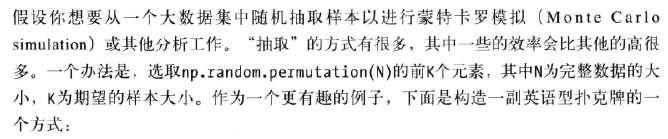

In [123]:
Image(filename="picture\Random Sampling and Permutation.png")

In [127]:
# 红桃（Hearts）, 黑桃（Spades）,梅花（ Clubs）,方片（ Diamonds）
suits = ['H', 'S', 'C', 'D']
card_val = (range(1, 11) + [10] * 3) * 4
base_names = ['A'] + range(2, 11) + ['J', 'K', 'Q']
print card_val
print 
print base_names

cards = []
for suit in ['H', 'S', 'C', 'D']:
    cards.extend(str(num) + suit for num in base_names)

deck = Series(card_val, index=cards)
print deck
deck[:13]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'K', 'Q']
AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64


AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
dtype: int64

In [129]:
def draw(deck, n=5): # 从整副牌中抽出5张
    return deck.take(np.random.permutation(len(deck))[:n])

draw(deck)

4C    4
AS    1
2H    2
AC    1
5S    5
dtype: int64

In [131]:
get_suit = lambda card: card[-1] # 只要最后一个字母就可以了

print deck.groupby(get_suit).apply(draw, n=2) # 从每种花色中随机抽取两张牌
deck.groupby(get_suit, group_keys=False).apply(draw, n=2) # 另一种方法

C  6C      6
   JC     10
D  9D      9
   6D      6
H  KH     10
   6H      6
S  10S    10
   8S      8
dtype: int64


3C    3
7C    7
9D    9
AD    1
AH    1
2H    2
9S    9
8S    8
dtype: int64

### 5 示例：分组加权平均数和相关系数

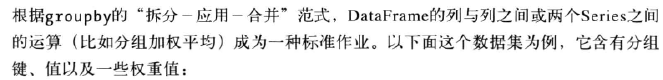

In [132]:
Image(filename="picture\Group Weighted Average and Correlation.png")

In [ ]:
df = DataFrame({'category': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],'data': np.random.randn(8),
 'weights': np.random.rand(8)})

grouped = df.groupby('category')
get_wavg = lambda g: np.average(g['data'], weights=g['weights'])
grouped.apply(get_wavg)

In [ ]:
close_px = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)

close_px[-4:]

rets = close_px.pct_change().dropna()
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)

# Annual correlation of Apple with Microsoft
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

### 6 示例：面向分组的线性回归

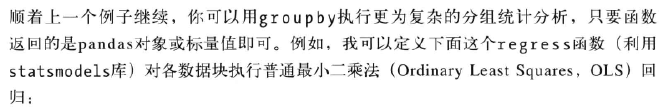

In [133]:
Image(filename="picture\Group-wise Linear Regression.png")

In [134]:
import statsmodels.api as sm
def regress(data, yvar, xvars):
    Y = data[yvar]
    X = data[xvars]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

ImportError: No module named statsmodels.api

In [ ]:
by_year.apply(regress, 'AAPL', ['SPX'])

## 四、透视表和交叉表

### 1 透视表（pivot table）

### 2 交叉表（crosstab）

### 3 示例：2012联邦选举委员会数据库

#### 3.1 根据职业和雇主统计赞助信息 

#### 3.2 对出资额分组

#### 3.3 根据州统计赞助信息